## Task and Goal:
In this notebook, we want to revise and modify the rnn **regression** notebook we learned from mofan's video.  
The **goal** is to grab a better understanding of RNN as a prediction model.  
The **task** is then:  
1. modify the format of input to simulate our financial data
2. change the layer dimensions accordingly to fit the model (challenging part.)

### 1. Toy model test
Here, we generate some fake data to test the model.

In [1]:
import torch
from torch import nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = torch.randn(1, 100, 12)
print(data.size())

torch.Size([1, 100, 12])


In [27]:
data[:,:2,:]

tensor([[[ 0.0138, -0.4167,  1.4651,  0.4104, -0.4140, -1.0407, -0.4664,
          -0.3975, -0.8543,  1.1309, -0.7778, -1.6786],
         [ 0.9704,  0.1135,  0.6346,  0.3732, -0.4819,  0.8748,  0.1210,
           1.1366, -0.3635,  1.0505,  0.8145, -0.2515]]])

In [29]:
print(data[0].size())
data[0]

torch.Size([100, 12])


tensor([[ 0.0138, -0.4167,  1.4651,  ...,  1.1309, -0.7778, -1.6786],
        [ 0.9704,  0.1135,  0.6346,  ...,  1.0505,  0.8145, -0.2515],
        [-2.7264,  0.9686, -1.0000,  ...,  2.0921,  1.2037, -0.3476],
        ...,
        [-0.8164, -0.0762,  1.3119,  ..., -0.6137, -0.1876,  1.9818],
        [-0.9342,  0.9342,  0.9005,  ...,  0.6509,  0.2531,  0.8515],
        [-0.2573,  0.0044,  1.6089,  ..., -1.5131,  2.4126,  0.8745]])

In [4]:
EPOCH = 1
BATCH_SIZE = 1
TIME_STEP = 10
INPUT_SIZE = 12
LR = 0.01

In [5]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 30,
            num_layers = 1,
            batch_first = True
        )
        self.out = nn.Linear(30, 12) # is the first number here = hidden_size? and second = 1 for regression?
        
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
#         outs = []
#         for time_step in range(r_out.size(1)): #???...hum..why not range(time_step?)
#             outs.append(self.out(r_out[:, time_step, :]))
#         return torch.stack(outs, dim=1), h_state
        r_out = r_out.view(-1,30)
        outs = self.out(r_out)
        return outs, h_state
    
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = nn.MSELoss()

h_state = None
    

RNN(
  (rnn): RNN(12, 30, batch_first=True)
  (out): Linear(in_features=30, out_features=12, bias=True)
)


In [6]:
torch.manual_seed(1)


for i in range(1, data.size(1)//BATCH_SIZE-1):
# for i in range(1, 200):    
    print(i)
    x = data[:,((i-1)*BATCH_SIZE):(i * BATCH_SIZE),:]
    y = data[:,(i * BATCH_SIZE+1),:]
    
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.data
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step() 
#     if step %1 == 0:
    print('Step: ', i, '| train loss: %.4f' % loss.data.numpy())    

1
Step:  1 | train loss: 1.4086
2
Step:  2 | train loss: 0.8989
3
Step:  3 | train loss: 1.3688
4
Step:  4 | train loss: 0.9468
5
Step:  5 | train loss: 0.9278
6
Step:  6 | train loss: 1.1741
7
Step:  7 | train loss: 1.5252
8
Step:  8 | train loss: 1.4569
9
Step:  9 | train loss: 0.9410
10
Step:  10 | train loss: 0.9517
11
Step:  11 | train loss: 1.1464
12
Step:  12 | train loss: 2.0098
13
Step:  13 | train loss: 2.0307
14
Step:  14 | train loss: 0.7553
15
Step:  15 | train loss: 1.2335
16
Step:  16 | train loss: 0.9237
17
Step:  17 | train loss: 0.9132
18
Step:  18 | train loss: 2.2163
19
Step:  19 | train loss: 0.7320
20
Step:  20 | train loss: 1.6227
21
Step:  21 | train loss: 1.4013
22
Step:  22 | train loss: 0.8143
23
Step:  23 | train loss: 1.0847
24
Step:  24 | train loss: 1.0021
25
Step:  25 | train loss: 0.7223
26
Step:  26 | train loss: 0.9300
27
Step:  27 | train loss: 0.5650
28
Step:  28 | train loss: 1.4096
29
Step:  29 | train loss: 0.5424
30
Step:  30 | train loss: 0.738

In [7]:
print(prediction)
print(y)

tensor([[ 0.1470,  0.3870, -0.1489,  0.2920,  0.2054, -0.1866, -0.1912,  0.4354,
         -0.0209, -0.7571, -0.0532, -0.1190]], grad_fn=<ThAddmmBackward>)
tensor([[ 0.2689, -0.4908, -0.2760,  0.7299, -0.9108,  0.4038, -0.5539, -0.4288,
          1.2873,  0.2868,  0.3210,  0.5704]])


In [8]:
# plt.figure(1, figsize=(12, 5))
# plt.ion()           # continuously plot

# for step in range(100):
#     start, end = step * np.pi, (step+1)*np.pi   # time range
#     # use sin predicts cos
#     steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
#     x_np = np.sin(steps)    # float32 for converting torch FloatTensor
#     y_np = np.cos(steps)

#     x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
#     y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

#     prediction, h_state = rnn(x, h_state)   # rnn output
#     # !! next step is important !!
#     h_state = h_state.data        # repack the hidden state, break the connection from last iteration

#     loss = loss_func(prediction, y)         # calculate loss
#     optimizer.zero_grad()                   # clear gradients for this training step
#     loss.backward()                         # backpropagation, compute gradients
#     optimizer.step()                        # apply gradients

#     # plotting
# #     plt.plot(steps, y_np.flatten(), 'r-')
# #     plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
# #     plt.draw(); plt.pause(0.05)
#     if step %20 == 0:
#         print('Step: ', step, '| train loss: %.4f' % loss.data.numpy())
# # plt.ioff()
# # plt.show()

In [9]:
prediction.unsqueeze(0)

tensor([[[ 0.1470,  0.3870, -0.1489,  0.2920,  0.2054, -0.1866, -0.1912,
           0.4354, -0.0209, -0.7571, -0.0532, -0.1190]]],
       grad_fn=<UnsqueezeBackward0>)

###  2. Using SPY500 data from 2017

In [3]:
import pandas as pd

In [12]:
data = pd.read_csv("/Users/toby/Documents/PycharmProjects/Pi3Orion/SP500_01012000_10072018.csv")
print(data.shape)
data.head()

(4721, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [13]:
data = data.drop("Adj Close",1)
data.Volume = data.Volume // 10000000
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4721 entries, 0 to 4720
Data columns (total 6 columns):
Date      4721 non-null object
Open      4721 non-null float64
High      4721 non-null float64
Low       4721 non-null float64
Close     4721 non-null float64
Volume    4721 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 221.4+ KB


In [14]:
# version 1, without any feature engineering
spy_df = data.drop("Date",1)
spy_df.head()

,Open,High,Low,Close,Volume
0,1469.250000,1478.000000,1438.359985,1455.219971,93
1,1455.219971,1455.219971,1397.430054,1399.420044,100
2,1399.420044,1413.270020,1377.680054,1402.109985,108
3,1402.109985,1411.900024,1392.099976,1403.449951,109
4,1403.449951,1441.469971,1400.729980,1441.469971,122


In [15]:
spy_df = torch.tensor(spy_df.values).unsqueeze(dim = 1).float()
print(spy_df.size())
spy_df = spy_df.view([1,-1,5])
print(spy_df.size())

torch.Size([4721, 1, 5])
torch.Size([1, 4721, 5])


In [16]:
print(spy_df[0].size())
spy_df[0]

torch.Size([4721, 5])


tensor([[1469.2500, 1478.0000, 1438.3600, 1455.2200,   93.0000],
        [1455.2200, 1455.2200, 1397.4301, 1399.4200,  100.0000],
        [1399.4200, 1413.2700, 1377.6801, 1402.1100,  108.0000],
        ...,
        [2931.6899, 2939.8601, 2921.3601, 2925.5100,  359.0000],
        [2919.3501, 2919.7800, 2883.9199, 2901.6101,  349.0000],
        [2902.5400, 2909.6399, 2869.2900, 2885.5701,  332.0000]])

In [42]:
EPOCH = 4
BATCH_SIZE = 1
# TIME_STEP = 10
INPUT_SIZE = 5
LR = 0.005


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 30,
            num_layers = 2,
            batch_first = True
        )
        
        
        self.rnn2 = nn.RNN(
            input_size = 5,
            hidden_size = 30,
            num_layers = 2,
            batch_first = True
        )
            
        self.out = nn.Linear(30, 5) # is the first number here = hidden_size? and second = 1 for regression?
        
    def forward(self, x, h_state):
        
        r_out, h_state = self.rnn(x, h_state)
        
        r_out, h_state = self.rnn2(x, h_state)
        
        r_out = r_out.view(-1,30)
        
        outs = self.out(r_out)
        
        return outs, h_state
    
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = nn.MSELoss()

h_state = None
min_train_loss = 999999999
loss_list = []
prediction_save = []

for epoch in range(EPOCH):
    for i in range(1, spy_df.size(1)-1):
    #     print(i)
        x = spy_df[:,((i-1)*BATCH_SIZE):(i * BATCH_SIZE),:]
        y = spy_df[:,(i * BATCH_SIZE+1),:]
#         y = spy_df[:,(i * BATCH_SIZE+1),:]

        prediction, h_state = rnn(x, h_state)
        h_state = h_state.data
        prediction_save.append(prediction)

        loss = loss_func(prediction, y)
        optimizer.zero_grad()                   # clear gradients for this training step
        loss.backward()                         # backpropagation, compute gradients
        optimizer.step() 
        
        if loss.data.numpy() <= min_train_loss:
            min_train_loss = loss.data.numpy()
            print("updating new train loss: ", loss.data.numpy())
        loss_list.append(loss.data.numpy())
        if i %100 == 0:
            print('Step: ', i, '| train loss: %.2f' % loss.data.numpy())        

RNN(
  (rnn): RNN(5, 30, num_layers=2, batch_first=True)
  (rnn2): RNN(5, 30, num_layers=2, batch_first=True)
  (out): Linear(in_features=30, out_features=5, bias=True)
)
updating new train loss:  1566121.2
updating new train loss:  1559401.9
updating new train loss:  1515224.2
updating new train loss:  1506604.0
updating new train loss:  1484876.1
updating new train loss:  1440741.0
updating new train loss:  1434633.2
updating new train loss:  1428354.1
Step:  100 | train loss: 1487941.75
updating new train loss:  1391246.1
updating new train loss:  1367705.0
Step:  200 | train loss: 1367705.00
updating new train loss:  1349735.1
updating new train loss:  1344077.2
updating new train loss:  1325633.1
updating new train loss:  1313934.5
updating new train loss:  1243140.1
updating new train loss:  1213885.4
updating new train loss:  1197235.4
updating new train loss:  1161576.2
updating new train loss:  1146781.0
updating new train loss:  1131532.4
updating new train loss:  1076785.5
u

Step:  2200 | train loss: 51045.42
Step:  2300 | train loss: 286177.75
Step:  2400 | train loss: 74091.11
Step:  2500 | train loss: 15515.73
Step:  2600 | train loss: 77839.27
Step:  2700 | train loss: 6269.03
Step:  2800 | train loss: 19958.94
Step:  2900 | train loss: 4936.83
Step:  3000 | train loss: 482.02
Step:  3100 | train loss: 21358.61
Step:  3200 | train loss: 38669.82
Step:  3300 | train loss: 57178.60
Step:  3400 | train loss: 129515.93
Step:  3500 | train loss: 197336.22
Step:  3600 | train loss: 241464.17
Step:  3700 | train loss: 350612.81
Step:  3800 | train loss: 391272.53
Step:  3900 | train loss: 343861.12
Step:  4000 | train loss: 359130.78
Step:  4100 | train loss: 330776.47
Step:  4200 | train loss: 349237.94
Step:  4300 | train loss: 517870.38
Step:  4400 | train loss: 665018.56
Step:  4500 | train loss: 888921.69
Step:  4600 | train loss: 1043571.31
Step:  4700 | train loss: 1326342.88
Step:  100 | train loss: 50568.48
Step:  200 | train loss: 57341.98
Step:  30

In [43]:
print(min_train_loss) 
# 22100 steps and 44200 steps gives similar loss at 15 with LR = 0.01
# 44200 steps with LR = 0.005 gives loss at 1.82
# 88400 steps with LR = 0.0025 gives loss at 3.8

6.1031647


In [47]:
print("prediction: ",prediction[-1])
print("y label : ",y[-1])

prediction:  tensor([1672.7499, 1681.1732, 1663.8157, 1673.1177,  355.4963],
       grad_fn=<SelectBackward>)
y label :  tensor([2902.5400, 2909.6399, 2869.2900, 2885.5701,  332.0000])


In [28]:
len(loss_list)

47190

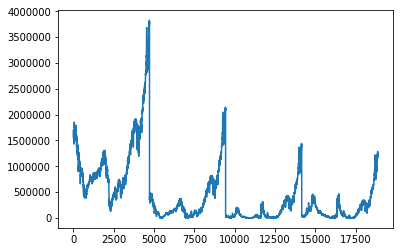

In [44]:
plt.plot(loss_list)

In [45]:
loss_list[-10:]

[array(1248379.6, dtype=float32),
 array(1246592.8, dtype=float32),
 array(1237217.4, dtype=float32),
 array(1239448.9, dtype=float32),
 array(1233417.8, dtype=float32),
 array(1259782., dtype=float32),
 array(1255280.4, dtype=float32),
 array(1264927.5, dtype=float32),
 array(1217749.1, dtype=float32),
 array(1189055.1, dtype=float32)]

In [121]:
print(loss_func(prediction, y))

tensor(1445402.1250, grad_fn=<MseLossBackward>)


In [122]:
loss_func(prediction, y).data.numpy()

array(1445402.1, dtype=float32)